# Arizona Restaurants Data Analysis

### Overview
In this project, we explore the relationship between resturants' ratings in Arizona and three factors, including the crime rate, customers' real comment, and attributes. We use several techniques in our project: sentiment analysis, data cleaning, data visualization, exploratory data analysis, SVM modeling, regression analysis, hypothesis testing to explore these factors in depth. We aim to investigate how these three major factors affect the ratings of resturants in Arizona and use that to predict the ratings of resturants in Arizona.

### TEAM NAME: AZ Restaurants Explorer
TEAM MEMBERS: Guanyi Su, Zhanchong Deng, Yueting Wu, Jiayun Wang, Yimei Zhao

TEAM MEMBER IDS: A15538515, A15491777, A15534973, A15570215, A15603085

### Research Question
Does the star level on Yelp really reflect people's feelings about the restaurants?

Can we use the local crime rate and certain attributes of the restaurants to predict the ratings of resturants in Arizona?

### Background
People having being more cautious when choosing resturants and hanging out with friends. Yelp provided a platform for people to connect with great business. What are the factors affecting the ratings of resturants? Our group explore ratings of resturants in Arizona and try to find out the relationship between ratings and three factors: consumers' review texts, the crime rate, and attributes. The reason for using Arizona is that we notice that there is a large porportion in our restaurant dataset is from Arizona, and we believe that the correlation and prediction would be more acccurate with more information.


To make sure our data are not biased, we only choose restaurants who have over 8 reviews so that those reviews/ratings are more trustworthy.


We extract datasets from Yelp, Phonenix open data. And we get map information from OpenStreetMap.


Our datasets from the Yelp contains main information we need, including starts, longitude, latitude, postal code, texts, etc. We have two datasets, business and reviews. For business, each entry contains information about one business in the US from Yelp. And for reviews, each entry contains information of one yelp review from one user. We combine these two datasets in our project to better develop our investigation between resturants' ratings and three factors. For the crime rate part, we look into Phenix Open Data which include information about each crime record. We combine two datasets in part two to for better map visualization, hypothesis tests and generating models. In part three, we choose the following attributes to further investigate: WiFi, Alcohol, OutdoorSeating, BusinessAcceptesCreditCards, RestaurantsPriceRange2, NoiseLevel. Overall, that's how datassets are used in our project.

### Prior Work
Other research and visualizations have been done by looking at resturants' ratings of resuturants on Yelp and the crime rate in AZ. With further exploratation, we would like to establish a more integral relationship between different variables and ratings of resturants in Arizona.

References:
1. Data Exploration on Yelp Resturants: 
     https://public.tableau.com/views/Yelp_data_analysis/Yelpresturantanalysis?:embed=y&:showVizHome=no&:display_count=y&:display_static_image=y&:bootstrapWhenNotified=true
    
2. Data Exploration and map visualization on the crime rate in Arizona: 

    https://www.neighborhoodscout.com/az/crime
    

### Hypothesis

We choose some factors to try to predict the rating of the restaurant. We make the hypothesis: the crime rate, review counts and level of noise will influence the rating of the restaurant in some degree. We predict that if the crime rate is lower, the review counts are more, and level of noise is lower, the rating of the restaurant will be higher. 

There are existed research said that the noise level will affect people’s mental feelings. For the restaurant ratings, it is also closely related to how people feels during eating. Thus, the level of noise that inside the attributes column might possibly be related to the ratings. What’s more, there are also existed research that claims crime rate will results the amount of restaurants nearby. And the amounts of restaurant will also possibly affect the ratings from the views. There are no direct support for how review counts will affect ratings of the restaurant. But when we look at yelp or other kind of customer based stuff like Amazon, most of us will take a look at review first. Both the review counts and the description in the review will be taken into consideration. Stuffs that have a high review counts will tend to be either super good and super bad, and this is based on our life experience. Thus, we want to know if there exists some kind of relationship between the rating of the restaurant in Arizona and the level of noises, crime rate and review counts.

### Data Set

* Dataset Name: Yelp Dataset buisness

Link to the dataset: https://www.yelp.com/dataset

Number of observations: 1.2 million

Description:
Yelp business dataset contains a lot of information that about the restaurant in Yelp. It records all the restaurant related information like restaurant id, location (including state, zip code, longitude, latitude), rating, categories and so on. There are also some more sophisticated attributes that described in a dictionary that contained in the attribute part. And we basically uses the restaurant information in Arizona to see its rating value’s affecting factors. It takes us a lot of time to do the data exploratory since there are so many possible influential factors in the dataset. 

* Dataset Name: Yelp Dataset reviews

Link to the dataset: https://www.yelp.com/dataset

Number of observations: 150,000

Description:
Yelp review dataset is more narrowed to information that about reviews. It contains information like the restaurant id, date that reviews, ratings, text that for the reviews and so on. Since the reviews of the restaurant is a possible factor to influence the ratings, combining this dataset with the previous business one will be a great choice. Since both of them share business id, combing them by id and use rating and the text in review dataset will be used.

* Dataset Name: Phenix Open Data

Link to the dataset: https://www.phoenixopendata.com/dataset/crime-data

Number of observations: 286,450

Description:
This dataset contains a lot of information about the crime’s happening in different places. It contains the information including the kind of crime(Uniform Crime Reporting), the place that the crime take place(zip code, and accurate street), time that crime happened, and so on. We want to combine it with the restaurant data set to see whether the crime rate will affect some information in the the restaurant dataset.

### Setup & import


In [2]:
#import libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import collections

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support

import patsy
import statsmodels.api as sm

Loading Datasets
    - business: each entry contains information about one business in the US from Yelp.
    - reviews: each entry contains information of one yelp review from one user.
    - crime_df: each entry contains one crime record.

In [4]:
businesses = pd.read_json ('data/business.json', lines=True)
reviews = pd.read_json('data/reviews.json', lines=True)
crime_df = pd.read_csv('data/crime.csv', low_memory=False)

In [5]:
print("businesses's column:",businesses.columns.to_list())
print()
print("review's column:",reviews.columns.to_list())
print()
print("crime_df's column:",crime_df.columns.to_list())

businesses's column: ['address', 'attributes', 'business_id', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state']

review's column: ['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id']

crime_df's column: ['INC NUMBER', 'OCCURRED ON', 'OCCURRED TO', 'UCR CRIME CATEGORY', '100 BLOCK ADDR', 'ZIP', 'PREMISE TYPE']


### Data Cleaning & Data Processing

#### Original Data 

In [6]:
businesses.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


### Drop the Null Values
We choose to drop nan values in businesses dataframe.

In [7]:
businesses.dropna(inplace = True)

We want to focus on only **restaurants in AZ** from the the massive business dataset of the U.S

In [8]:
AZ_businesses = businesses[businesses['state'] == 'AZ']
AZ_restaurants_all = (AZ_businesses[AZ_businesses['categories'].str.contains('Restaurant')])

As users, we often distrust restaurant ratings with **small numbers of reviews**, even if they have high ratings. Thus, we want to only work with restaurants who has over **8** reviews so that those reviews/ratings are more trustworthy. This number is selected to have enough sample to work with.

In [9]:
AZ_restaurants_all = AZ_restaurants_all[AZ_restaurants_all['review_count'] > 8]
AZ_restaurants_all.reset_index(inplace = True)
AZ_restaurants_all.head(2)

,index,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ
1,78,"13843 N Tatum Blvd, Ste 15","{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",44YFU284Z3KDEy25QyVoUw,"Chinese, Restaurants",Phoenix,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,33.613020,-111.977036,Nee House Chinese Restaurant,85032,269,3.5,AZ


## Part 1: Sentiment Analysis on Restaurant Review Data

The star level of a restuarant is the average value of all the star level given by consumers on Yelp. However, we cannot ensure that the star level is reliable. Some people may tend to give a higher rate than they really thought. Some restaurants staff may give consumers benefits for giving a high rate. 

Does the star rates of Arizonian restuarants truely reflect people's thoughts in the review texts?

To answer this question, we choose to conduct a sentiment analysis on restaurant review data.

In [10]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


### Data Cleaning

We need to extract the reviews for the Arizona restuarants.

We select three major columns that might be useful, including 'business_id', 'stars', 'text'. And as what we did to businesses, we drop nan values. In order to let dataframe better serve our investigation, we merge two dataframes into one dataframe.

In [11]:
reviews = reviews[['business_id', 'stars', 'text']]
reviews.dropna(inplace=True)
Arizona_reviews = pd.merge(AZ_restaurants_all, reviews, on='business_id', how='inner')
Arizona_reviews.head() 

,index,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars_x,state,stars_y,text
0,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ,3,"I mean it's Taco Bell, so it is what it is. Ho..."
1,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ,1,"1 star for service, but the food is not ok :( ..."
2,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ,4,Taco Bell has really improved over the years a...
3,78,"13843 N Tatum Blvd, Ste 15","{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",44YFU284Z3KDEy25QyVoUw,"Chinese, Restaurants",Phoenix,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,33.613020,-111.977036,Nee House Chinese Restaurant,85032,269,3.5,AZ,4,Enjoyed Nee House immensely. No service issues...
4,78,"13843 N Tatum Blvd, Ste 15","{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",44YFU284Z3KDEy25QyVoUw,"Chinese, Restaurants",Phoenix,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,33.613020,-111.977036,Nee House Chinese Restaurant,85032,269,3.5,AZ,3,I'm not sure how I rate this restaurant becaus...


Remove all the information we do not need.

In [12]:
AZ_reviews = Arizona_reviews[['name', 'stars_y', 'text']]
AZ_reviews.columns = ['name', 'star_rate', 'text']
AZ_reviews.head()

,name,star_rate,text
0,Taco Bell,3,"I mean it's Taco Bell, so it is what it is. Ho..."
1,Taco Bell,1,"1 star for service, but the food is not ok :( ..."
2,Taco Bell,4,Taco Bell has really improved over the years a...
3,Nee House Chinese Restaurant,4,Enjoyed Nee House immensely. No service issues...
4,Nee House Chinese Restaurant,3,I'm not sure how I rate this restaurant becaus...


We define a **"good"** rate to be the star_rate greater equal than 3 and a **"bad"** rate to be the star_rate smaller than 3. 
We add a new column called "positive". A '1' in this column means it is positive. A '0' in this column means it is not. We will train a SVM model to check if the star_rate given by the user really show their actual thoughts from review.

In [13]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/suguanyi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suguanyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

For convenience, we convert the numerical star rate into the binary value of whether the review is positive.

In [14]:
#this function converts the numerical star rate into the binary value of whether the review positive
def convert_star_rate(rate):
    if(rate >= 3):
        return 1
    else:
        return 0

In [59]:
AZ_reviews['positive'] = AZ_reviews['star_rate']
AZ_reviews['positive'] = AZ_reviews['positive'].apply(convert_star_rate)
AZ_reviews.head()

,name,star_rate,text,positive
0,Taco Bell,3,"I mean it's Taco Bell, so it is what it is. Ho...",1
1,Taco Bell,1,"1 star for service, but the food is not ok :( ...",0
2,Taco Bell,4,Taco Bell has really improved over the years a...,1
3,Nee House Chinese Restaurant,4,Enjoyed Nee House immensely. No service issues...,1
4,Nee House Chinese Restaurant,3,I'm not sure how I rate this restaurant becaus...,1


Since the dataset is too large here which would make the runtime very slow, we choose to 
analyze the first 5000 rows. We will use these data to train and test a SVM classifier

In [16]:
AZ_reviews = AZ_reviews.head(5000)

### Convert Text data into vector 

We use CountVectorizer as feature selection to convert a collection of text documents to a matrix of token counts.

In [17]:
vectorizer = CountVectorizer(analyzer = 'word', max_features = 2000, tokenizer = word_tokenize, 
                             stop_words = stopwords.words('english' ))

In [18]:
review_X = vectorizer.fit_transform(AZ_reviews['text']).toarray()

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [19]:
review_y = AZ_reviews['positive'].to_numpy()

### Extracting train & test Data

We split data into training data and testing data.

In [20]:
num_training = 3500

In [21]:
review_train_X = review_X[0:num_training]
review_train_y = review_y[0:num_training]
review_test_X = review_X[num_training:]
review_test_y = review_y[num_training:]

### Train SVM

We use SVM model and set the kernel as linear to train our review text from customers.

In [22]:
clf = SVC(kernel='linear')
clf.fit(review_train_X,review_train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
print(review_test_X)

[[1 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


### Predict Outcome

Here, we are trying to predict our test data.

In [24]:
review_predicted_train_y = clf.predict(review_train_X)
review_predicted_test_y = clf.predict(review_test_X)

From the below classification report, we can see that our model is accurate when predict training data which is used as training previously. Thus, we can see that our model works well for training data.

In [25]:
print(classification_report(review_train_y, review_predicted_train_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       641
           1       1.00      1.00      1.00      2859

   micro avg       1.00      1.00      1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



As we pass testing data into our model, we can see that precisions decrease a bit. This report shows that our model can predict correctly for the most of the time. We can see that there's difference in precision of 0 and 1, so we conclude that our model can predict postive reviews correctly most of the time, but our model might not be as accurate as predicting positive when it predicts negative reviews. In the other words, our model might predict positive reviews as negative incorrectly.

In [26]:
print(classification_report(review_test_y, review_predicted_test_y))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       360
           1       0.90      0.93      0.92      1140

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.83      0.81      0.82      1500
weighted avg       0.87      0.87      0.87      1500



## Result interpretation

The SVM perform very accurately when predicting the training data. We can see the accuracy for both 0 and 1 in training data prediction reaches 1.00, which means the model fits the training data very well.

For test data, the prediction accuracy for 0 reaches 0.76 and the prediction accuracy for 1 reaches 0.90, which means
the model can predict correctly for the most of the time. It is acceptable accuracy. 

Thus, we can conclude that star levels of the restaurants truely reflect costumers' feelings about the restaurants, and we can continue our following analysis based on star levels.

___

## Part 2: Investigate Restaurant Ratings and Nearby Crime

It is easy to assume safe neighborhood is a plus to a restaurant. **However, does that actually affect yelp ratings?** Keep in mind that crime happening in the area are not quite as visible as how the food looks as well as how clean the tables are, so it is questionable how crime rates would actually affect the ratings of a restaurnt in the area.

Additional Data Processing for this brach's purpose

In [27]:
reviews_related = ['business_id', 'city', 'latitude', 'longitude', 'name','stars', 'postal_code']
AZ_restaurants = AZ_restaurants_all[reviews_related]
AZ_restaurants.head()

,business_id,city,latitude,longitude,name,stars,postal_code
0,1Dfx3zM-rW4n-31KeC8sJg,Phoenix,33.495194,-112.028588,Taco Bell,3.0,85016
1,44YFU284Z3KDEy25QyVoUw,Phoenix,33.613020,-111.977036,Nee House Chinese Restaurant,3.5,85032
2,r8764MtYyt8JhxMvrfM_xQ,Chandler,33.302093,-111.842613,Vintage 95,4.0,85225
3,nsNONDHbV7Vudqh21uicqw,Scottsdale,33.454286,-111.909405,Salt Cellar,3.5,85257
4,Rs8Wi4OEjeOX7LVlzsXDOA,Phoenix,33.537164,-112.132926,Sushi Mocorito,3.0,85051


#### Data Visualization

The star ratings on yelp is the best indicator of how **good** the restaurant is. A distribution on how the restaurant perform should help us see how the restaurants are doing in Arizona.

Text(0, 0.5, 'counts')

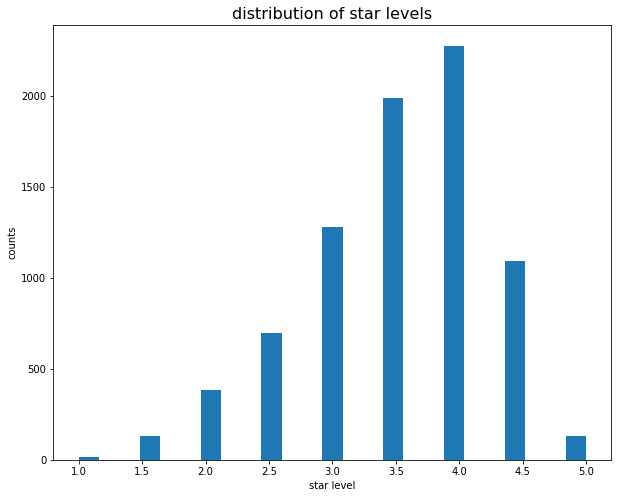

In [60]:
x = AZ_restaurants['stars']
plt.figure(figsize=(10, 8))
plt.hist(x, bins = 25)
plt.title("distribution of star levels", fontsize=16)
plt.xlabel('star level')
plt.ylabel('counts')

### Histogram analysis
From the bar graph above we can see the stars level is approximately normally distribuited. The median is about **3.5**.
- We would use the median to determine if the quality of the restaurant is above or below average, or to classify them as **good/room for improvements**.

To better understand our data, we visualize it with a scatter plot, where each dot represent a restaurant and the darker the dots are, the higher the ratings are for that restaurant.

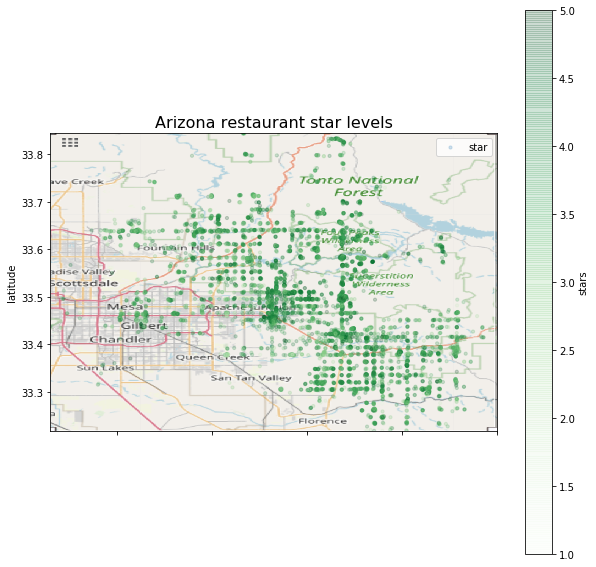

In [56]:
long = AZ_restaurants['longitude']
lat = AZ_restaurants['latitude']
BBox = (long.min(), long.max(), lat.min(), lat.max())
BGmap = plt.imread('data/AZ_map.png')

ax = AZ_restaurants.plot(kind="scatter", x="longitude", y="latitude", s=10, label="star", c="stars", 
                          colormap="Greens", colorbar=True, alpha=0.2, figsize=(10,10))

ax.set_title('Arizona restaurant star levels', fontsize = 16)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])


ax.imshow(BGmap, zorder=0, extent = BBox, aspect= 'equal')

Now, we also want to look at the criminal activity happening in the neighborhood.

In [47]:
crime_df.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
1,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
2,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
3,201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014.0,PARKING LOT
4,201600000527709,11/01/2015 00:00,03/22/2016 00:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017.0,PARKING LOT


In [48]:
len(crime_df['PREMISE TYPE'].unique())

99

For our purpse, we only care about a crime's category and where it happened in general. PREMISE type is not included because it is quite hard to analyze it, as there are 99 undifferentiable type in the column.

In [49]:
crime_df = crime_df[['UCR CRIME CATEGORY', 'ZIP']]
crime_df = crime_df.dropna()
crime_df = crime_df.reset_index()
# Trim the .0 at the end
crime_df['ZIP'] = crime_df.ZIP.astype(int)
crime_df['ZIP'] = crime_df.ZIP.astype(str)
AZ_restaurants['postal_code'] = AZ_restaurants.postal_code.astype(str)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Now, each entry represents a crime happening in the correspound zipcode area.

In [50]:
crime_df.head()

,index,UCR CRIME CATEGORY,ZIP
0,0,RAPE,85006
1,1,MOTOR VEHICLE THEFT,85029
2,2,MOTOR VEHICLE THEFT,85307
3,3,LARCENY-THEFT,85014
4,4,LARCENY-THEFT,85017


Now, to see how criminal activities affect nearby restaurants, we must group these records by zip code and append them to back to the restaurant dataframe. In this way, we combine the two data frames of restaurants and crimes.

In [51]:
crime = list(crime_df['ZIP'])
ctr = collections.Counter(crime)
AZ_restaurants['crimes'] = AZ_restaurants['postal_code']
for i in range(len(AZ_restaurants)):
    AZ_restaurants.loc[i, "crimes"] = ctr[ AZ_restaurants.loc[i, "crimes"]]
AZ_restaurants.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,business_id,city,latitude,longitude,name,stars,postal_code,crimes
0,1Dfx3zM-rW4n-31KeC8sJg,Phoenix,33.495194,-112.028588,Taco Bell,3.0,85016,8020
1,44YFU284Z3KDEy25QyVoUw,Phoenix,33.613020,-111.977036,Nee House Chinese Restaurant,3.5,85032,8588
2,r8764MtYyt8JhxMvrfM_xQ,Chandler,33.302093,-111.842613,Vintage 95,4.0,85225,7
3,nsNONDHbV7Vudqh21uicqw,Scottsdale,33.454286,-111.909405,Salt Cellar,3.5,85257,9
4,Rs8Wi4OEjeOX7LVlzsXDOA,Phoenix,33.537164,-112.132926,Sushi Mocorito,3.0,85051,12339


Now we can visualize the restaurants again, but with how many crimes happened around that area as how deep each dot is.

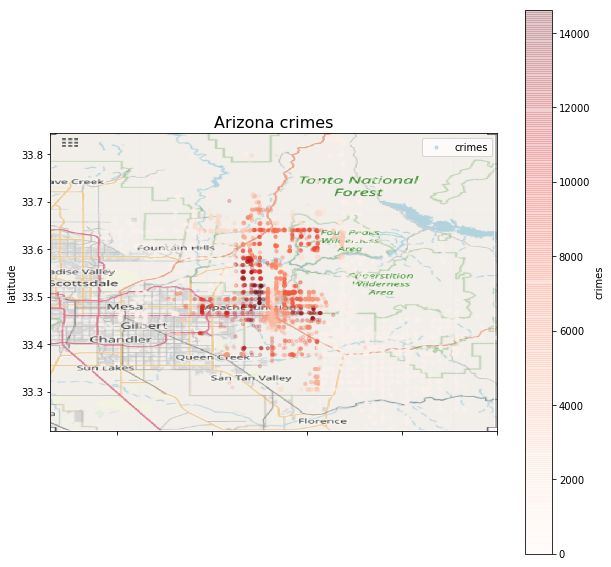

In [55]:
BGmap = plt.imread('data/AZ_map.png')

ax = AZ_restaurants.plot(kind="scatter", x="longitude", y="latitude", s=10, label="crimes", c="crimes", 
                          colormap="Reds", colorbar=True, alpha=0.2, figsize=(10,10))

ax.set_title('Arizona crimes', fontsize = 16)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(BGmap, zorder=0, extent = BBox, aspect= 'equal')

### Scatterplot w/ stars/crimes Analysis

With these two scatterplot, we can see some pattern by just comparing them. Areas like Apache Junction(around the word apache) is heavily dotted with dark green(indicating numerous criminal activities over time) is also dotted with light red(indicating below average restaurant ratings). On the other hand, a little bit to the right of apache junction(where the junction is on the map) is more heavily dotted with light green(indicating little criminal activities over time) is also dotted with dark red(indicating above average restaurant ratings). **It looks like criminal activities is correlated with restaurant's ratings**. But to be professional, we must take it to the next step --> **linear regression**. 

**Null Hypothesis:**  
Any difference between the distribution of stars in AZ restaurants and the distribution of criminal activities around the Area are simply by chance.

**Alternative Hypothesis:**  
Nope, they definitely have a correlation.

In [57]:
stars_n_crimes = AZ_restaurants[['crimes','stars']]

Train/Test split

In [35]:
train_size = int(len(stars_n_crimes) * 0.9)
X_train = np.array(stars_n_crimes['crimes'][:train_size]).reshape(-1,1)
Y_train = np.array(stars_n_crimes['stars'][:train_size]).reshape(-1,1)
X_test = np.array(stars_n_crimes['crimes'][train_size:]).reshape(-1,1)
Y_test = np.array(stars_n_crimes['stars'][train_size:]).reshape(-1,1)

Training model

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

Uses both r2_score and mean squared error to determine how related the distributions are.

Coefficient: [[4.22993362e-06]]
MSE between our model's prediction and actual: 0.5831471588741112
Coefficient of determination is: -0.0005905719272361054


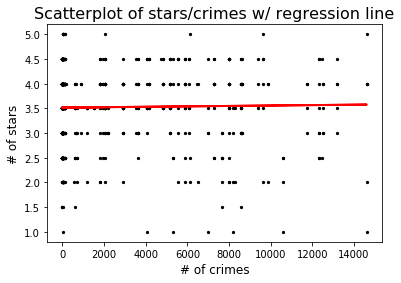

In [37]:
from sklearn.metrics import r2_score, mean_squared_error
print("Coefficient:", lr.coef_)
print("MSE between our model's prediction and actual:", mean_squared_error(Y_test, Y_pred))
print("Coefficient of determination is:", r2_score(Y_test, Y_pred))

plt.scatter(stars_n_crimes['crimes'][train_size:], 
            stars_n_crimes['stars'][train_size:], 
            color = 'black', 
            s=5)
plt.xlabel("# of crimes", fontsize = 12)
plt.ylabel("# of stars", fontsize = 12)
plt.title("Scatterplot of stars/crimes w/ regression line", fontsize = 16)
plt.plot(stars_n_crimes['crimes'][train_size:], Y_pred, color='red', linewidth = 2)

### What can we conclude from theses result?

1. **Coefficient of determination**: coefficient of determination gives us insight into how well the regression line captures the population. Low value of R2 indicates that the model fails to predict most of the testing population, which indicates that there seem not to be much relationship between crimes and the ratings of nearby restaurants.
2. **Mean Squared Error**: the mean square error calculates how far apart the predicted distribution of stars based on the regression line and the actual distribution of stars based on the same set of crimes distribution. Since we get such a huge number, it is clear that our predictions are pretty bad. It is quite likely that these two distribution doesn't share much relationship for our model to predict with, thus another evidence that crimes are not related to restaurant ratings.
3. **Graph and Linear Regression Line**: To further consolidate our theory, we graphed out the distribution of our testing data and the linear regression line generated by our model. It appaers our data is quite distributed, thus our regression line doesn't quite covers the data in any way.

### Conclusion: Although it looks like they some correlation, a restaurant's rating is not really related to the criminal activities around the area.

___

## Part 3: Relationship between attributes and the restaurants's ratings.

Could restaurant's ratings be related to other things as well? After a closer look at the data, we decide to investigate further into the **attributes** column, which contains rich informations about what the restaurants has to offer.

In [38]:
AZ_restaurnts_attr = AZ_restaurants_all[['stars','attributes','review_count']]
AZ_restaurnts_attr['attributes'][110].keys()

dict_keys(['RestaurantsPriceRange2', 'BusinessAcceptsCreditCards', 'RestaurantsGoodForGroups', 'WheelchairAccessible', 'NoiseLevel', 'Alcohol', 'OutdoorSeating', 'RestaurantsAttire', 'CoatCheck', 'Smoking', 'WiFi', 'RestaurantsDelivery', 'Music', 'Caters', 'DogsAllowed', 'RestaurantsTakeOut', 'RestaurantsReservations', 'GoodForMeal', 'GoodForDancing', 'HasTV', 'Ambience', 'GoodForKids', 'BusinessAcceptsBitcoin', 'BikeParking', 'BusinessParking', 'BestNights'])

After looking over a few attributes, we determined a few attributes we wish to investigate:

In [39]:
attribute_list = ['WiFi', 
                  'Alcohol',
                  'OutdoorSeating',
                  'BusinessAcceptsCreditCards',
                  'RestaurantsPriceRange2', 
                  'NoiseLevel']

Select only the restaurants with these attributes

In [40]:
def has_attributes(attribute_map):
    for must_have in attribute_list:
        if must_have not in attribute_map.keys():
            return False
    return True

attribute_table = AZ_restaurnts_attr[AZ_restaurnts_attr['attributes'].apply(has_attributes)]
attribute_table.reset_index(inplace = True,drop = True)
print(len(attribute_table))
attribute_table.head(2)

6378


,stars,attributes,review_count
0,3.5,"{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",269
1,4.0,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...",320


Extract attributes into individual columns

In [41]:
def extract_attribute(attr_dict):
    return attr_dict[cur_key]

for cur_key in attribute_list:
    attribute_table.loc[:,cur_key] = attribute_table['attributes'].apply(extract_attribute)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [42]:
attribute_table.head()

,stars,attributes,review_count,WiFi,Alcohol,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsPriceRange2,NoiseLevel
0,3.5,"{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",269,u'no','beer_and_wine',False,True,2,u'average'
1,4.0,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...",320,u'free',u'full_bar',True,True,2,u'average'
2,3.5,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",526,u'no','full_bar',False,True,3,u'average'
3,3.0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...",188,u'no',u'none',False,True,1,'average'
4,3.0,"{'Ambience': '{'romantic': False, 'intimate': ...",104,u'no',u'full_bar',True,False,2,u'average'


### Data Cleaning

Change column names for easier use.

In [43]:
attribute_table = attribute_table.rename(
                    columns={"WiFi": "wifi", 
                             "OutdoorSeating": "outdoor", 
                             "BusinessAcceptsCreditCards": "creditcards",
                             "Alcohol":"alcohol",
                             "RestaurantsPriceRange2": "price",
                             "NoiseLevel": "noise"}, 
                    errors="raise")

In [44]:
attribute_table.head(2)

,stars,attributes,review_count,wifi,alcohol,outdoor,creditcards,price,noise
0,3.5,"{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",269,u'no','beer_and_wine',False,True,2,u'average'
1,4.0,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...",320,u'free',u'full_bar',True,True,2,u'average'


In [45]:
attribute_table['wifi'].unique()

array(["u'no'", "u'free'", "'no'", "'free'", "u'paid'", 'None', "'paid'"],
      dtype=object)

We want to clean WiFi to be 2 if provides, 1 if paid, and 0 if not.

In [46]:
def clean_wifi(s):
    if "no" in s.lower():
        return 0
    elif "paid" in s.lower():
        return 1
    else:
        return 2

attribute_table.loc[:,'wifi'] = attribute_table['wifi'].apply(clean_wifi)

In [47]:
attribute_table.head()

,stars,attributes,review_count,wifi,alcohol,outdoor,creditcards,price,noise
0,3.5,"{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",269,0,'beer_and_wine',False,True,2,u'average'
1,4.0,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...",320,2,u'full_bar',True,True,2,u'average'
2,3.5,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",526,0,'full_bar',False,True,3,u'average'
3,3.0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...",188,0,u'none',False,True,1,'average'
4,3.0,"{'Ambience': '{'romantic': False, 'intimate': ...",104,0,u'full_bar',True,False,2,u'average'


OutdoorSeating and BusinessAcceptingCrediCard should be transformed to 1 for True and 0 for False.

In [48]:
def bool_to_int(b):
    if b:
        return 1
    else:
        return 0

attribute_table.loc[:,'outdoor'] = attribute_table['outdoor'].apply(bool_to_int)
attribute_table.loc[:,'creditcards'] = attribute_table['creditcards'].apply(bool_to_int)

In [49]:
attribute_table.head()

,stars,attributes,review_count,wifi,alcohol,outdoor,creditcards,price,noise
0,3.5,"{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",269,0,'beer_and_wine',1,1,2,u'average'
1,4.0,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...",320,2,u'full_bar',1,1,2,u'average'
2,3.5,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",526,0,'full_bar',1,1,3,u'average'
3,3.0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...",188,0,u'none',1,1,1,'average'
4,3.0,"{'Ambience': '{'romantic': False, 'intimate': ...",104,0,u'full_bar',1,1,2,u'average'


In [50]:
attribute_table['alcohol'].unique()

array(["'beer_and_wine'", "u'full_bar'", "'full_bar'", "u'none'",
       "u'beer_and_wine'", "'none'", 'None'], dtype=object)

If it's not none, then it provides alcohol.

In [51]:
def clean_alcohol(s):
    if "none" in s.lower():
        return 0
    else:
        return 1

attribute_table.loc[:,'alcohol'] = attribute_table['alcohol'].apply(clean_alcohol)

In [52]:
attribute_table.head()

,stars,attributes,review_count,wifi,alcohol,outdoor,creditcards,price,noise
0,3.5,"{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",269,0,1,1,1,2,u'average'
1,4.0,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...",320,2,1,1,1,2,u'average'
2,3.5,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",526,0,1,1,1,3,u'average'
3,3.0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...",188,0,0,1,1,1,'average'
4,3.0,"{'Ambience': '{'romantic': False, 'intimate': ...",104,0,1,1,1,2,u'average'


Price column turns out to be strings, so simple conversion should do.

In [53]:
attribute_table['price'].dtype

dtype('O')

In [54]:
attribute_table.loc[:,'price'] = attribute_table['price'].astype(int)

In [55]:
attribute_table.head()

,stars,attributes,review_count,wifi,alcohol,outdoor,creditcards,price,noise
0,3.5,"{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",269,0,1,1,1,2,u'average'
1,4.0,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...",320,2,1,1,1,2,u'average'
2,3.5,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",526,0,1,1,1,3,u'average'
3,3.0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...",188,0,0,1,1,1,'average'
4,3.0,"{'Ambience': '{'romantic': False, 'intimate': ...",104,0,1,1,1,2,u'average'


In [56]:
attribute_table['noise'].unique()

array(["u'average'", "'average'", "u'quiet'", "'loud'", "'quiet'",
       "u'loud'", "u'very_loud'", "'very_loud'", 'None'], dtype=object)

Because None noise is quite impossible, we will count the None as average.
- very loud = 3
- loud = 2
- average = 1
- quiet = 0
- None = 1

In [57]:
def clean_noise(s):
    if "very_loud" in s.lower():
        return 3
    elif "loud" in s.lower():
        return 2
    elif "average" in s.lower():
        return 1
    elif "quiet" in s.lower():
        return 0
    elif "none" in s.lower():
        return 1
    else:
        return s

attribute_table.loc[:,'noise'] = attribute_table['noise'].apply(clean_noise)

In [58]:
attribute_table.head()

,stars,attributes,review_count,wifi,alcohol,outdoor,creditcards,price,noise
0,3.5,"{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",269,0,1,1,1,2,1
1,4.0,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...",320,2,1,1,1,2,1
2,3.5,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",526,0,1,1,1,3,1
3,3.0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...",188,0,0,1,1,1,1
4,3.0,"{'Ambience': '{'romantic': False, 'intimate': ...",104,0,1,1,1,2,1


Now we can take out attributes column and start analyzing.

In [59]:
attribute_table = attribute_table.drop(columns="attributes")

### Analzying each column

Before diving into their correlations, let's look at each column's unique value more closely.

In [60]:
attribute_table.apply(lambda x: pd.unique(x).tolist())

stars               [3.5, 4.0, 3.0, 2.5, 4.5, 2.0, 1.5, 5.0, 1.0]
review_count    [269.0, 320.0, 526.0, 188.0, 104.0, 563.0, 23....
wifi                                              [0.0, 2.0, 1.0]
alcohol                                                [1.0, 0.0]
outdoor                                                     [1.0]
creditcards                                                 [1.0]
price                                        [2.0, 3.0, 1.0, 4.0]
noise                                        [1.0, 0.0, 2.0, 3.0]
dtype: object

Notice that outdoor and creditcards both have one unique value. It looks like all restaurant in this set has outdoor seating and credit card as a paying option, thus it is not reasonable to analyze these two column.

In [61]:
attribute_table = attribute_table.drop(columns=['outdoor', 'creditcards'])

Now that we have all these attributes, we wish to see which ones are most correlated with our stars. For this purpose, we are using a heatmap.

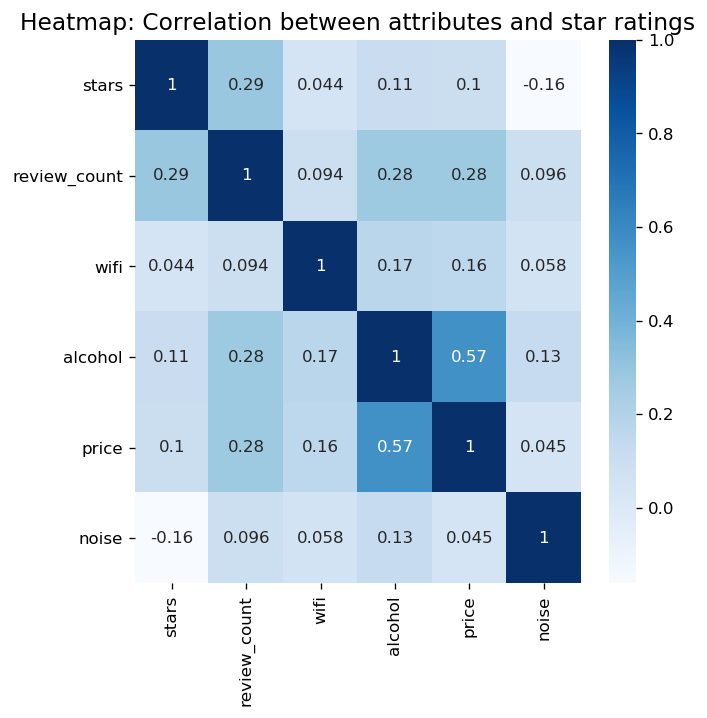

In [62]:
correlation_table = attribute_table.corr()
plt.figure(figsize=(6,6), dpi=120)
sns.heatmap(data=correlation_table,
            xticklabels = attribute_table.columns,
            yticklabels = attribute_table.columns,
            annot = True,
            cmap="Blues")
plt.title("Heatmap: Correlation between attributes and star ratings", fontsize= 14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# === Fixing the cut off === #
# Reference: https://github.com/mwaskom/seaborn/issues/1773
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

### Heatmap Analysis
Contrary to our intuition, wifi seem to have the least effect on restaurant's ratings. The top two attributes are numbers of reviews and the noise level of the restaurants. We would apply an Ordinary Least Square to these two attributes to prove our hypothesis.

$H_0$, the null hypothesis states given feature does not correlates to the number of stars a restaurant receives.  
$H_a$, the alternative hypothesis states given feature does correlates to the number of stars a restaurant receives.

### Analyzing **Number of Reviews**

In [64]:
import statsmodels.api as sm
# To calculate the intercept of the line
attribute_table['intercept'] = 1
ols_count = sm.OLS(attribute_table['stars'], 
                             attribute_table[['review_count', 'intercept']])
count_res = ols_count.fit()
ols_noise = sm.OLS(attribute_table['stars'], 
                             attribute_table[['noise', 'intercept']])
noise_res = ols_noise.fit()

In [65]:
count_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     581.3
Date:                Mon, 16 Mar 2020   Prob (F-statistic):          5.40e-123
Time:                        16:11:00   Log-Likelihood:                -6475.3
No. Observations:                6378   AIC:                         1.295e+04
Df Residuals:                    6376   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
review_count     0.0010   4.19e-05     24.111      0.000       0.001       0.001
intercept        3.3862      0.011    315.851      0.000       3.365       3.407
==============================================================================
Omnibus:                      206.461   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.206
Skew:                          -0.458   Prob(JB):                     7.58e-50
Kurtosis:                       3.105   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### What do we learn from this huge chank of information?
- $R-squared = 0.432$, which means this model works just fine.
- $P>|t| = 0$. With such a low p-value, it is save to **reject** the $H_0$, which means number of reviews **does correlates positively** with how good the restaurant's ratings.

We can also graph it out to see it more clearly.

Text(0.5, 1.0, 'Scatterplot w/ regression Line for stars/review counts')

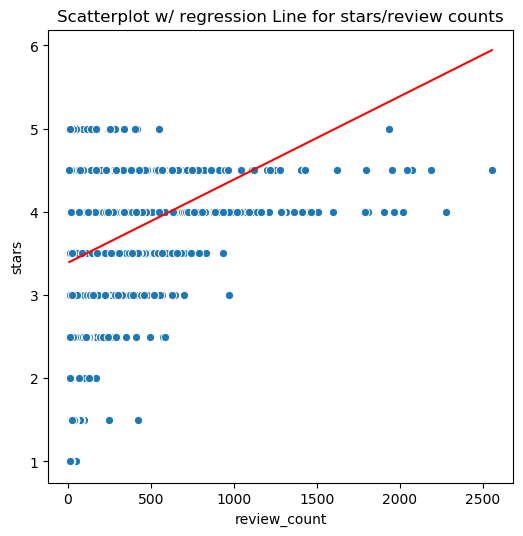

In [66]:
# The data
plt.figure(figsize=(6,6), dpi=100)
sns.scatterplot(x = attribute_table['review_count'],
                y = attribute_table['stars'])
# The line
x = np.arange(attribute_table['review_count'].min(), attribute_table['review_count'].max())
y = x * 0.001 + 3.3862
plt.plot(x,y, color='red')

# Title
plt.title("Scatterplot w/ regression Line for stars/review counts")

#### Scatergraph w/ regression line Analysis
The scatterplot supports our theory. From the graph we can see that most data points distributes on the upper left corner of graph, meaning most restaurant's with higher ratings tend to have more reviews. Thus, the regression line generated captures that perfectly, as it divides the graph into two triangles, showing a positive correlation between number of reviews and number of stars.

### Analyzing **Noise Level**

In [67]:
noise_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     171.9
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           9.21e-39
Time:                        16:11:02   Log-Likelihood:                -6668.7
No. Observations:                6378   AIC:                         1.334e+04
Df Residuals:                    6376   BIC:                         1.335e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
noise         -0.2054      0.016    -13.109      0.000      -0.236      -0.175
intercept      3.7352      0.017    223.812      0.000       3.703       3.768
==============================================================================
Omnibus:                      364.796   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.577
Skew:                          -0.627   Prob(JB):                     8.62e-94
Kurtosis:                       3.197   Cond. No.                         3.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### What do we learn from this huge chank of information?
- $R-squared = 0.679$, which means this model works just fine.
- $P>|t| = 0$. With such a low p-value, it is save to **reject** the $H_0$, which means the noise level **does correlates negatively** with how good the restaurant's ratings.

Before we graph this one as well, it is worth a closer look at the data we have.

In [68]:
attribute_table[['stars','noise']].head()

,stars,noise
0,3.5,1
1,4.0,1
2,3.5,1
3,3.0,1
4,3.0,1


### Plot twist!!!
Both stars/noise are **discrete variables**, which means they take only a few values from a list of options. Graphing this distribution can be tricky because if we simply graph them without any preprocessing, we end up with a graph of dots that does not represent the population. For example: if there are a lot of restaurants with stars level at 3.5 and noise level at 1 and only one restaurant with stars level at 3.5 and noise level at 3, **our graph does not capture that differnce, it merely shows if a data point existsted or not**. Thus, we did a sophisticated counter to add weight to each data point to reflect that difference.

This is before we weighted the points, notice that the regression line doesn't make much sense.

Text(0.5, 1.0, 'Scatterplot w/ regression Line for stars/review counts(unweighted)')

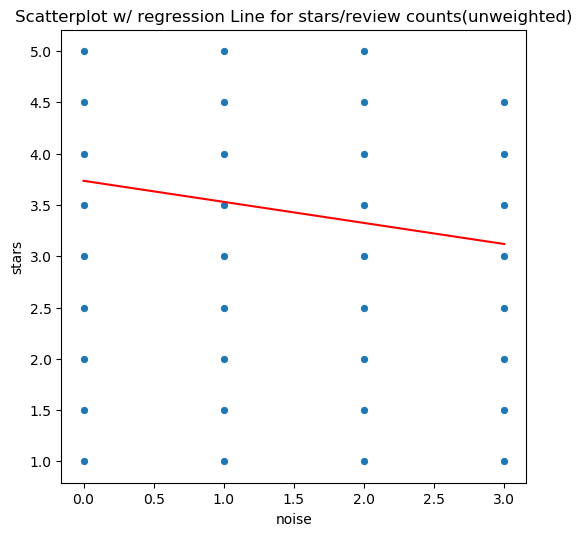

In [69]:
# The data
plt.figure(figsize=(6,6), dpi=100)
sns.scatterplot(x = attribute_table['noise'],
                y = attribute_table['stars'])
# The line
x = np.arange(attribute_table['noise'].min(), attribute_table['noise'].max()+0.5, 0.5)
y = x * -0.2054 + 3.7352
plt.plot(x,y, color='red')

# Title
plt.title("Scatterplot w/ regression Line for stars/review counts(unweighted)")

Apply weight to each point by counting them.

In [70]:
import collections
attribute_table['combine'] = attribute_table['stars'].astype(str) + "*" + attribute_table['noise'].astype(str)
data = dict(collections.Counter(attribute_table['combine'].tolist()))
weighted_noise = pd.DataFrame(data = [], columns = ['stars', 'noise', 'count'])
index = 0
for key in data.keys():
    stars = float(key[:key.find("*")])
    noise = int(key[key.find("*")+1:])
    weighted_noise.loc[index] = [stars, noise, data[key]]
    index += 1

In [71]:
weighted_noise.head()

,stars,noise,count
0,3.5,1.0,1302.0
1,4.0,1.0,1496.0
2,3.0,1.0,806.0
3,4.0,0.0,351.0
4,2.5,1.0,365.0


This graph looks way better now, with darker dots = more data points.

Text(0.5, 1.0, 'Scatterplot w/ regression Line for stars/review counts(weighted)')

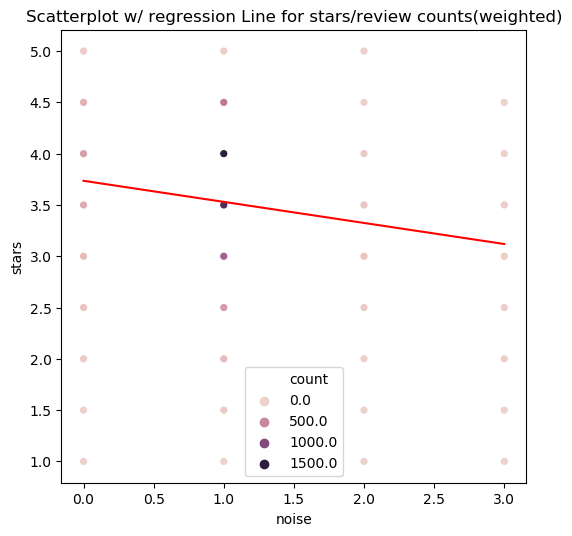

In [72]:
# The data
plt.figure(figsize=(6,6), dpi=100)
sns.scatterplot(x = weighted_noise['noise'],
                y = weighted_noise['stars'],
                hue = weighted_noise['count'])
# The line
x = np.arange(weighted_noise['noise'].min(), weighted_noise['noise'].max() + 0.5, 0.5)
y = x * -0.2054 + 3.7352
plt.plot(x,y, color='red')

# Title
plt.title("Scatterplot w/ regression Line for stars/review counts(weighted)")

#### Scattergraph w/ regression line Analysis
Now the linear regression line makes more sense. Although it doesn't capture all the points shown, it predicts the most dense data points well, with noise level at 1 and moderately high ratings. This does support that quiet restaurants tend to receive a higher ratings.

### Conclusion: 
- both review counts and level of noise correlates to the ratings of the restaurants out of all possible attributes we reviewed. We suspect that people tend to like restaurants that are visited by many, and most people doesn't like loud noises when they eat. However, those are only our attempt to explain such correlations, because correlations does not lead to causation.  

- This could be useful to restaurant owners, in that if they wish to get a higher rating, consider reducing the noise of their business and, more importantly, get people to review their restaurant more on Yelp.

# Ethical and Privacy Considerations

To start with the data collection, we get most of the data from Kaggle and Yelp. For these two data source, Kaggle is a online data community and platform where people share data for public use. Thus, we can use the data directly without applying for any further authoritization. Yelp also posts the datasets on their website "for public to use in personal, educational, and academic purposes", which is also open resource that we can go ahead and grab. Since our group is highly aware of the ethics and privacy concerns of our project and always keep that in mind throughout the project process, all of our members cross checked if the data source we use is llegal before we actually started. 

Our objective for the project is to explore the relationship between resturants' ratings in Arizona and three factors, including the crime rate, customers' real comment, and attributes. Based on this intent, we noticed several ethics and privacy issues.

First, since we aim to figure out if the crime rate in a certain area may affect the ratings of the restaurants. This may be decision-oriented for entrepreneurs and investors who are in the restaurant/bar industry or real estate market. When the entrepreneurs and investors are making decisions about the location of their bussiness, they may tend to choose the district with relatively low crime rate, which may cause the downfall of restaurant business in areas with high crime rate. If the area with high crime rate happens to be the area with high density of residents, this may lead to high demand of restaurant industry with low supply. Overtime, the lack of restaurant services may also drive away other business like entertainment industry, which will make the life of the people in high crime rate area worse off. Although the final conclusion of our crime rate--restaurant rating research question suggests that a restaurant's rating is not really related to the criminal activities around the area, this is a critical ethical concern we should be take into consideration when working on the project. Since restaurant rating is supposedly related to various factors, no matter how our conclusion looks like, we ourselves and any people who are concerned should take our project as a reference instead of making our conclusion as a high weighted factor when making decisions.

Furthermore, since we are doing the text sentiment analysis, which is based on the comments from real users of Yelp, we need to be aware of the privacy issue. The dataset we used for sentiment analysis includes attributes like `review_id`, `business_id` and `user_id`, which are codes to identify different restaurants or users instead of real names, which is one layer of protection for privacy. Besides, since we always keep in mind that those codes are not a nickname or a point on our plot and that they are real people who are susceptible to personal information leak, we need to be extra careful when the process of the project goes on. Since we are uncertain if those codes may provide any personal inforamtion or how they are formed, we did not make use of those attributes in our project or draw any conclusion with that in order to make sure the privacy is protected.

Except for the crime rate, we are also trying to make correlations between the restaurant ratings and lots of attributes like noise, price, review counts, etc. This may also affect the decision of restaurant runners. Again, like we mentioned in the first part, the conclusion we make should be considered reference since we only gathered data on some attributes which may be related with the restaurant ratings, issues like confounding may exist and a lot of other factors is yet to be explored. 

# Conclusion & Discussion

To recap on our project as a whole, we tried to answer three questions related to the Arizona restaurant ratings with the datasets we gathered, including:

* Does the star rates of Arizonian restuarants truely reflect people's thoughts in the review texts?
* Is there a relationship between the Arizona restaurant ratings and the crime rate of the district where the restaurants locate?
* Is there a relationship between the Arizona restaurant ratings and vaious attributes like amount of reviews, wifi availability, alcohol availability, price and noise?

Our conclusion to the first question is that by performing the text sentiment analysis with the SVM model, the result of training displays high precision and we can trust the star-level based ranking of restaurants to a great extent that the number of stars do reflect people's thoughts towards a certain restaurant.

Secondly, by plotting the map to visualize the crime rate distribution of Arizona, comparing it with the star ratings distribution of restaurants, and performing linear regression and statistical inference, we conclude that although it may be intuitive that high crime rate implies low star ratings of the restaurants, they are actually not correlated.

Lastly, we make use of the data sets we get from Yelp to investigate if restaurant ratings is related to other attributes we have data in hand. By plotting the heat map to visualize the correlation between star ratings and other attributes and performing statistical inference, we conclude that review counts and noise is significant in correlation with the restaurant ratings in Arizona.

# Future Work

Overall, the work we have done in this project to explore what factor affect the restaurant ratings in Arizona is initial since the data set we use does not include information of many attributes for us to explore and thus confounding effects may exist. There are still a lot of factors like restauant's internal and external enviornment, overall weather tendency of a certain area, capacity of the restaurant, etc. For future work, we should gather more attributes and explore how those attributes contribute in the restaurant ratings and how they interact with the attributes we already have. Also, since our project is based on the data of Arizona restaurants, to generalize the results of the project to restaurants overall, we will be needing data of restaurants of the whole country so that the result can be applied to the restauant industry. We may perform time series analysis, geospatial analysis and text sentiment analysis to fully explore the factors that exerts influence on restaurant reputation.